# Thompson sampling

## Steps

### Initialization step

Assign prior probability distributions to each arm's expected reward (e.g. using beta distributions).

### Recurrence Step

For each time step, repeat:

1. sample from the posterior distribution of each arm (e.g. using beta distribution sampling after incorporating observed rewards)
2. select the arm with the highest sample value (exploitation) and perform the corresponding action
3. observe the reward from the selected arm. Update the posterior distribution of the selected arm using the observed reward (e.g. update the beta distribution parameters)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [7]:
# True payout % (probabilities of success) of each arm.
# In reality, we do not know about these values.
actual_prob = [0.1, 0.7, 0.5] 

n = len(actual_prob)

# Count of success and failure of each arm.
success = np.zeros(n)
failure = np.zeros(n)

for trial in range(101):
    # Sample a data point (Thompson sampling) from all arms' Beta distrib.
    samples = [np.random.beta(a+1, b+1) for a, b in zip(success, failure)]

    # Pick the arm with the hight sampled estimate.
    best_arm = np.argmax(samples)

    # Play with the best arm.
    # Since each arm is modelled as bernoulli variable, to sample from bernoulli distribution is same as 
    # sampling a uniform distrib variable and comparing with p (payout), if it is less than p,
    # then Success, else Failure.
    if np.random.uniform() < actual_prob[best_arm]:
        success[best_arm] += 1
    else:
        failure[best_arm] += 1

    if trial % 10 == 0:
        print(f'trial: {trial}\tsuccess={success}\tfailure={failure}')

trial: 0	success=[0. 0. 0.]	failure=[1. 0. 0.]
trial: 10	success=[0. 1. 5.]	failure=[1. 1. 3.]
trial: 20	success=[1. 4. 6.]	failure=[2. 2. 6.]
trial: 30	success=[1. 8. 7.]	failure=[3. 4. 8.]
trial: 40	success=[ 1. 16.  7.]	failure=[3. 5. 9.]
trial: 50	success=[ 1. 21.  7.]	failure=[ 3. 10.  9.]
trial: 60	success=[ 2. 27.  8.]	failure=[ 4. 11.  9.]
trial: 70	success=[ 2. 34.  8.]	failure=[ 5. 13.  9.]
trial: 80	success=[ 2. 40.  9.]	failure=[ 5. 16.  9.]
trial: 90	success=[ 2. 47. 10.]	failure=[ 6. 16. 10.]
trial: 100	success=[ 2. 55. 10.]	failure=[ 7. 17. 10.]


In [11]:
list(zip(success, failure))

[(2.0, 7.0), (55.0, 17.0), (10.0, 10.0)]

Text(0.5, 0, 'Probability')

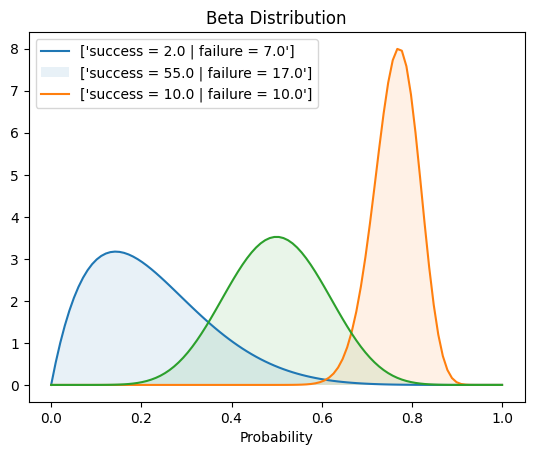

In [21]:
X = np.linspace(0, 1, 100)
legends = []
for a, b in zip(success, failure):
    pdf = beta.pdf(X, a, b)
    plt.plot(X, pdf)
    plt.fill_between(X, 0, pdf, alpha=0.1)
    legends.append([f'success = {a} | failure = {b}'])
plt.legend(legends)
plt.title('Beta Distribution')
plt.xlabel('Probability')